# DAV 5400 Project 4

**Manasi Akre, Maojudan Nihemaiti, Humayra Kausar**

# Introduction

A mushroom or toadstool is the fleshy, spore-bearing fruiting body of a fungus, typically produced above ground, on soil, or on its food source. Currently, there are over 14,000 species of mushrooms, which is suspected to be only a fraction of the actual numbers. While eating mushrooms is popular all over the world, many are not fit for this purpose. About 20% of these mushrooms are harmful, and eating them can make one sick, and about 1% of them can kill you. Unfortunately, differentiating between edible and poisonous mushrooms is difficult since there are no specific features that can tell the two apart.

However, this can be solved with the help of machine learning, which can use data to find whether a mushroom is edible or poisonous. In this project, we will be using the UCI Mushroom Data Set. The source of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/mushroom). We'll begin by importing and formatting the data and running some exploratory analysis on it before constructing a predictive model using scikit-learn library.

In [12]:
# Import pandas
import pandas as pd

# Import numpy
import numpy as np

# Import Seirs and DataFrame
from pandas import Series, DataFrame

# load the pyplot function from the matplotlib library
import matplotlib.pyplot as plt

# Import seaborn 
import seaborn as sns

# Import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [13]:
# Read the data from GitHub and create a data frame
mushroom = pd.read_csv('https://raw.githubusercontent.com/Humayrakausar/AIM-5001/master/agaricus-lepiota%20(1).data', header = None)

# Use head function to make sure the data loaded properly
mushroom.head(10)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [14]:
# To check the number of rows and columns in the dataset
mushroom.shape

(8124, 23)

The dataset contains 8124 rows and 23 columns

# Data Dictionary 

According to the website, the dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended.

The dataset contains of 8124 instances and 22 attributes, all the attributes are nominally valued

Classes: edible = e, poisonous = p  

The attributes of the data are as follows:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d


# Data Preparation

At this stage, we will create a sub dataframe with the columns that will indicate the class of the mushrooms and odor along with other variables to satisfy the project requirements.

In [46]:
# Make use of iloc function to cretae a sub dataframe
mushroom_sub = mushroom.iloc[:, [0, 1, 5, 17, 22,]].copy()
mushroom_sub.head()

,0,1,5,17,22
0,p,x,p,w,u
1,e,x,a,w,g
2,e,b,l,w,m
3,p,x,p,w,u
4,e,x,n,w,g


In [47]:
# Make use of isna and sum function to see if there are any null values in the data set
mushroom_sub.isna().sum()

0     0
1     0
5     0
17    0
22    0
dtype: int64

From the result above it can be stated that there is no null value presence in the dataset 

In [48]:
# Provide suitable name for each column
mushroom_sub.columns = ['Class', 'Cap_shape', 'Odor', 'Veil_color','Habitat']
mushroom_sub.head()

,Class,Cap_shape,Odor,Veil_color,Habitat
0,p,x,p,w,u
1,e,x,a,w,g
2,e,b,l,w,m
3,p,x,p,w,u
4,e,x,n,w,g


Now, We will transform all the single letter abbreviations into words for better comprehension

In [49]:
# Transform all the column's single letter abbreviated values into words 
mushroom_sub.Class.replace({'e':'edible','p': 'poisonous'}, inplace = True)

mushroom_sub.Cap_shape.replace({'b':'bell', 'c': 'conical', 'x':'convex', 'f': 'flat','k':'knobbed',
                                's': 'sunken'}, inplace = True)

mushroom_sub.Odor.replace({'a': 'almond', 'l': 'anise', 'c': 'creosote','y': 'fishy', 'f': 'foul', 'm': 'musty',
                          'n': 'none', 'p': 'pungent', 's':'spicy'}, inplace = True)

mushroom_sub.Veil_color.replace({'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'}, inplace = True)


mushroom_sub.Habitat.replace({'g': 'grasses', 'l': 'leaves', 'm': 'meadows','p':'paths', 'u': 'urban', 'w': 'waste',
                            'd': 'woods'}, inplace = True)

# To check whether all the intended transformation have completed properly 
mushroom_sub.head(10)

,Class,Cap_shape,Odor,Veil_color,Habitat
0,poisonous,convex,pungent,white,urban
1,edible,convex,almond,white,grasses
2,edible,bell,anise,white,meadows
3,poisonous,convex,pungent,white,urban
4,edible,convex,none,white,grasses
5,edible,convex,almond,white,grasses
6,edible,bell,almond,white,meadows
7,edible,bell,anise,white,meadows
8,poisonous,convex,pungent,white,grasses
9,edible,bell,almond,white,meadows


From the data above, it can be stated that all the column values transformed properly

The reason why we selected these columns are based on the [most well-known myths](https://medium.com/analytics-vidhya/mushroom-classification-edible-or-poisonous-9327a56c6fc9) that people have heard (and believe) about the mushrooms:

- All white colored mushrooms are edible
- Poisonous mushrooms smell and taste awful.
- Poisonous mushrooms always have bright, flashy colors
- All mushrooms that grow in woods, meadows, and pastures are safe to eat
- Poisonous mushrooms have pointy caps

We'll be testing whether these myths are true or not, along with what makes a mushroom edible, through the exploratory data analysis.

# Exploratory Data Analysis

Now that we have the dataset in a proper format, we can perform some analysis on it. We will do this by plotting some graphs and charts. We'll start with the data distribution table of each of the columns in our dataset, followed by plotting frequency charts of each of them.

In [50]:
# Make use of describe function to show the data distribution of each column
mushroom_sub.describe()

,Class,Cap_shape,Odor,Veil_color,Habitat
count,8124,8124,8124,8124,8124
unique,2,6,9,4,7
top,edible,convex,none,white,woods
freq,4208,3656,3528,7924,3148


The table above shows us that the given dataset has:
- 2 unique classes
- 6 unique cap shapes
- 9 unique odors
- 4 unique veil colors
- 7 unique habitats

Additionally, it also gives us the highest counted value (top) in each of the columns. For example, 'edible' has more frequencies than the other values in the 'class' column.

#### Frequency charts for each column

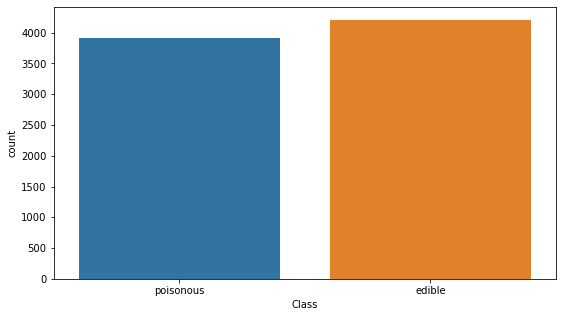

In [51]:
# frequency chart for 'Class'
plt.figure(figsize=(9,5))
class_chart = sns.countplot(x="Class", data=mushroom_sub)
class_chart

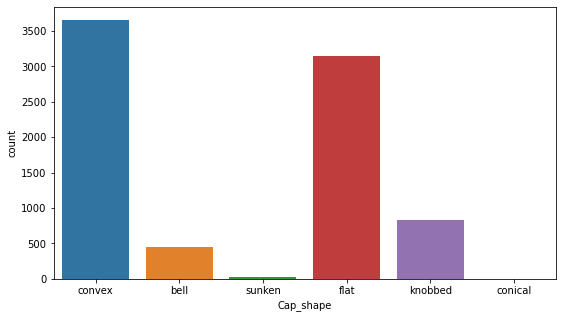

In [52]:
# frequency chart for 'Cap_shape'
plt.figure(figsize=(9,5))
cap_chart = sns.countplot(x="Cap_shape", data=mushroom_sub)
cap_chart

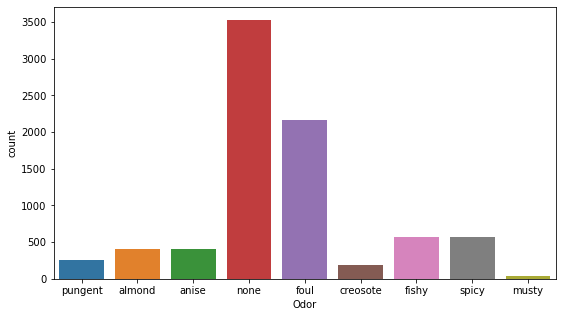

In [53]:
# frequency chart for 'Odor'
plt.figure(figsize=(9,5))
odor_chart = sns.countplot(x="Odor", data=mushroom_sub)
odor_chart

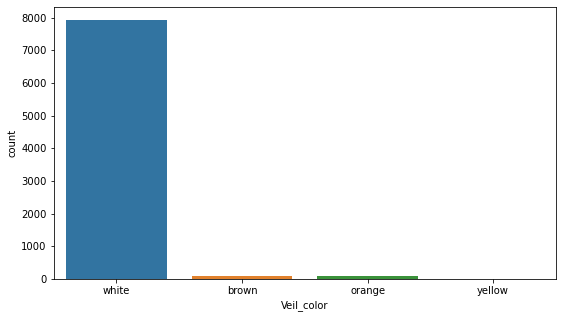

In [54]:
# frequency chart for 'Veil_color'
plt.figure(figsize=(9,5))
Veil_color_chart = sns.countplot(x="Veil_color", data=mushroom_sub)
Veil_color_chart

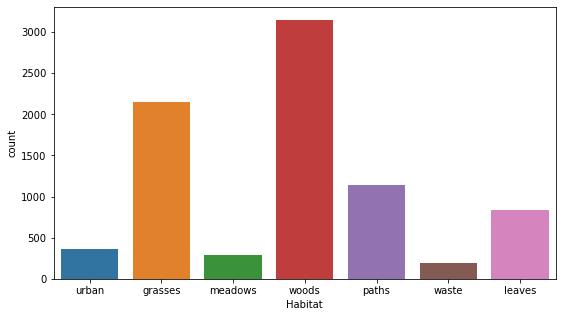

In [55]:
# frequency chart for 'Habitat'
plt.figure(figsize=(9,5))
Habitat_chart = sns.countplot(x="Habitat", data=mushroom_sub)
Habitat_chart

By plotting a bar plot showcasing the frequency of each element in the columns of the dataset, we get the following readings:

- The number of edible mushrooms exceeds poisonous ones by approximately 400.
- Most of the mushrooms have convex caps, followed by ‘flat’.
- Most of the mushrooms are odorless, followed by 'foul odor'.
- Most of the mushroom's veil colors are white.
- Most mushrooms are found in the woods, followed by grasses.

Now that we have a clear idea of the distribution of the features of the mushrooms in the dataset, we can do further analysis to see if a mushroom's odor, cap shape, and veil color determine whether it is edible or poisonous.

### Edibility of mushrooms based on its features

We'll analyze this by doing the following comparisons:

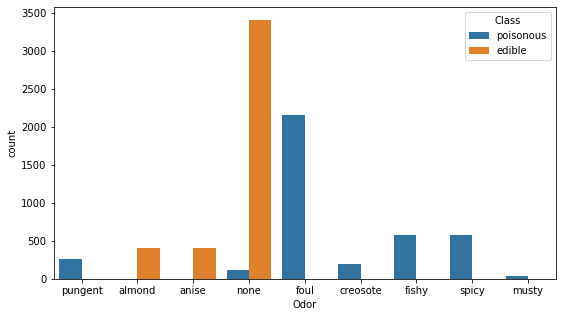

In [56]:
# class vs. odor
plt.figure(figsize=(9,5))
class_odor = sns.countplot(x="Odor", hue="Class", data=mushroom_sub)
class_odor

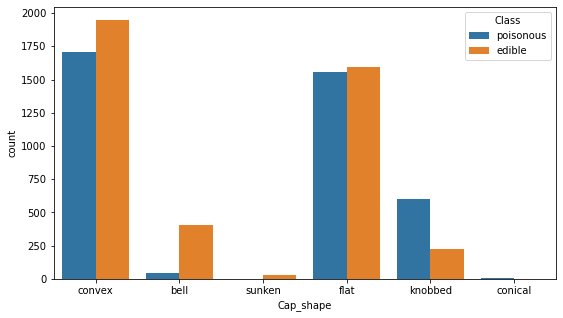

In [57]:
# class v. cap shape
plt.figure(figsize=(9,5))
class_cap = sns.countplot(x="Cap_shape", hue="Class", data=mushroom_sub)
class_cap

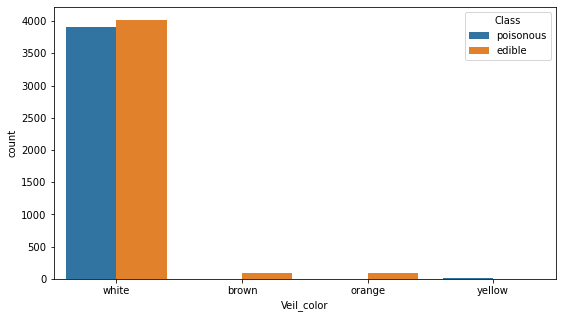

In [58]:
# class v. Veil_color
plt.figure(figsize=(9,5))
class_Veil_color = sns.countplot(x="Veil_color", hue="Class", data=mushroom_sub)
class_Veil_color

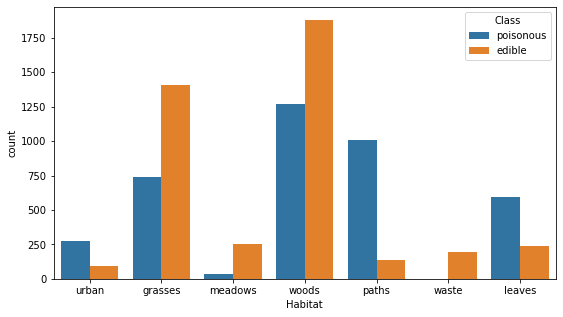

In [59]:
# class v. Habitat
plt.figure(figsize=(9,5))
class_Habitat = sns.countplot(x="Habitat", hue="Class", data=mushroom_sub)
class_Habitat

**Class vs. odor** <br />
Most edible mushrooms have no odor, whereas most poisonous ones have a foul. The poisonous ones also have varied types of odors when compared to the edible that ones have only two (almond and anise). Since the proportion of odorless edible mushrooms is far greater than the poisonous ones, we can say that **if a mushroom is odorless, it is most likely edible.** 

**Class vs. cap shape** <br />
Most edible mushrooms are convex or flat, but so are most poisonous ones. The difference between their frequencies isn't that great either, and hence we can say that **the cap shape is not a valid indicator of a mushroom's edibility.**

**Class vs. Veil color** <br />
Most edible mushrooms are white, but so are most poisonous ones. The difference between their frequencies is small, and hence we can say that **the veil color can't show if a mushroom is edible or not.**

**Class vs. Habitat** <br />
Most edible mushrooms are found in the wild, but so are most poisonous ones. While the difference between their frequencies is more than the ones in 'cap shape' and 'veil color', it is still not significant to establish if a mushroom found in the wild is edible. Hence, we can say that **one may or may not consider a mushroom found in the wild to be edible.**

Out of the four parameters we tested against 'class', the only determining factor we've found regarding a mushroom's edibilty is the 'odor'.

# Building the Predictive Models

With our EDA completed with preliminary conclusions, we can now start building a predictive model that can tell if a mushroom is edible or poisonous. We'll begin with Logistic Regression.

### Preparing Data for Logistic Regression

To perform regression on our given dataset, we'll first have to determine our independent and dependant variables. Since we want to predict the edibility of a mushroom, the 'class' column will be our independent variable. The other columns will be our dependant variables.

Additionally, regression can not be performed on categorical data, and hence, we'll be converting all our categorical data into numerics using dummy variables.

We'll first convert the 'class' column into dummy variables.

In [60]:
# Convert edible and poisonous indicators in class column into digits
mushroom_sub.Class.replace('edible', 0, inplace = True)
mushroom_sub.Class.replace('poisonous', 1, inplace = True)
# To check whether the class column values converted properly
mushroom_sub.head()

,Class,Cap_shape,Odor,Veil_color,Habitat
0,1,convex,pungent,white,urban
1,0,convex,almond,white,grasses
2,0,bell,anise,white,meadows
3,1,convex,pungent,white,urban
4,0,convex,none,white,grasses


From the data above, it can be inferred that the class column values were coverted properly. We'll now create dummy variables for the rest of the columns.

In [63]:
# To create dummy variables for rest of the columns 
m_dummy = pd.get_dummies(mushroom_sub)
# To check whether dummy variables created properly 
m_dummy.head()

,Class,Cap_shape_bell,Cap_shape_conical,Cap_shape_convex,Cap_shape_flat,Cap_shape_knobbed,Cap_shape_sunken,Odor_almond,Odor_anise,Odor_creosote,...,Veil_color_orange,Veil_color_white,Veil_color_yellow,Habitat_grasses,Habitat_leaves,Habitat_meadows,Habitat_paths,Habitat_urban,Habitat_waste,Habitat_woods
0,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


From the data above, it can be stated that the dummy variables have been created for all the intended columns properly.

**Separate the response and explanatory variables for training and testing data** <br />

In [64]:
# Separate response variable(y) from the dataset called m_dummy
y = m_dummy.iloc[:,0]
y.head()

0    1
1    0
2    0
3    1
4    0
Name: Class, dtype: int64

In [65]:
# Separate explanatory variables(x) from the dataset called m_dummy
x = m_dummy.iloc[:,1:]
x.head()

,Cap_shape_bell,Cap_shape_conical,Cap_shape_convex,Cap_shape_flat,Cap_shape_knobbed,Cap_shape_sunken,Odor_almond,Odor_anise,Odor_creosote,Odor_fishy,...,Veil_color_orange,Veil_color_white,Veil_color_yellow,Habitat_grasses,Habitat_leaves,Habitat_meadows,Habitat_paths,Habitat_urban,Habitat_waste,Habitat_woods
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


### Using Logistic Regression to predict

Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes).<br />

The goal of here is to find the best fitting (yet reasonable) model to describe the relationship between the dichotomous characteristic of interest (dependent variable) and the set of predictor (independant variable).

First we will run logistic regression on the entire data set to see the accuracy of the model

In [66]:
# Use a logistic regression algorithm, and fit with X and y
model = LogisticRegression()
model = model.fit(x,y)
model

LogisticRegression()

In [67]:
# Calculate the accuracy of the model relative to the entire data set
model.score(x,y)

0.9881831610044313

This model has an accuracy of 98%.

#### Examining the model coefficients for the explanatory variables

Logistic regression generates the coefficients that predict a logical transformation of the probability of presence of the characteristic of the interest. The coefficient of each feature can be understood as the importance of the feature based on the absolute value. We'll also use barplots to visually represent the results.

In [68]:
# Examine the model coefficients for the explanatory variables
model_coefs=pd.DataFrame(zip(x.columns, np.transpose(model.coef_)),columns=['Variables','Coefficients'])
model_coefs['Coefficients']=model_coefs['Coefficients'].astype(float)
model_coefs

,Variables,Coefficients
0,Cap_shape_bell,1.009905
1,Cap_shape_conical,1.425851
2,Cap_shape_convex,-1.304892
3,Cap_shape_flat,-0.503339
4,Cap_shape_knobbed,0.186752
5,Cap_shape_sunken,-0.814897
6,Odor_almond,-7.865484
7,Odor_anise,-7.865484
8,Odor_creosote,3.455126
9,Odor_fishy,3.450991


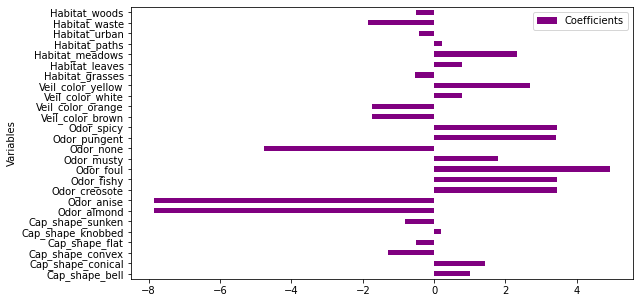

In [69]:
# Use bar plot to visualize the above results
model_coefs.plot(kind='barh', figsize=(9, 5),color="purple",x='Variables', y='Coefficients')

## Model Evaluation Using a Validation Set

**Spliting the dataset into [training and testing set](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)**<br />
We have testing and training values in the same dataset. To perform the evaluation, we will have to split the dataset into 70:30 ratio and see whether it produce the same results.

In [76]:
# To split the data set into a training set and a testing set into 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [77]:
# Use a logistic regression algorithm, and fit with X and y
model_s = LogisticRegression()
model_s = model_s.fit(x_train,y_train)
model_s

LogisticRegression()

After splitting the dataset into testing and training sets, we will compare whether the two models are giving us the same results or not.

#### Training Model

In [81]:
# Calculate the accuracy of the model relative to the training data set
model_s.score(x_train,y_train)

0.9887442842068238

#### Testing Model

In [82]:
# Calculate the accuracy of the model relative to the testing data set
model_s.score(x_test,y_test)

0.9868744872846595

Both of the dataset produced the same results at 98% accuracy, and there is a slight variation obsearved in regards to the accuracy between the two data sets. Also, we experienced the same accuracy when we use training and predicting on the same data at 98%. Therefore, we can use this model to predict whether a mushroom is edible or poisonous.

#### Examining the model coefficients for the explanatory variables

In [83]:
# Examine the model coefficients for the explanatory variables
model_coefs_s =pd.DataFrame(zip(x.columns, np.transpose(model_s.coef_)),columns=['Variables','Coefficients'])
model_coefs_s['Coefficients']=model_coefs_s['Coefficients'].astype(float)
model_coefs_s

,Variables,Coefficients
0,Cap_shape_bell,0.719882
1,Cap_shape_conical,1.024249
2,Cap_shape_convex,-1.035569
3,Cap_shape_flat,-0.360887
4,Cap_shape_knobbed,0.322788
5,Cap_shape_sunken,-0.671234
6,Odor_almond,-7.004766
7,Odor_anise,-6.949202
8,Odor_creosote,3.165302
9,Odor_fishy,3.159937


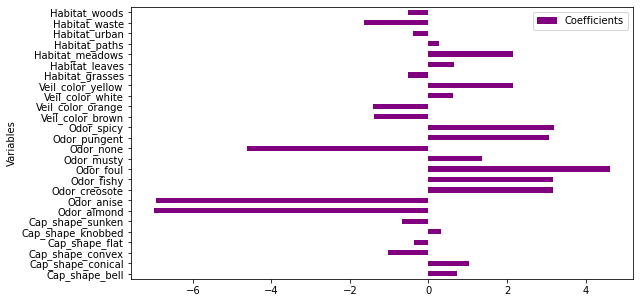

In [84]:
# Use bar plot to visualize the above results
model_coefs_s.plot(kind='barh', figsize=(9, 5),color="purple",x='Variables', y='Coefficients')

### Predictions

With our model ready, we can now run the predictions.

In [85]:
# Generate predicted results for the testing data based on the new model
predict_test = model_s.predict(x_test)
predict_test[:10]

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [86]:
# To check the similarity with x test
y_test[:10]

2743    0
6146    1
1943    0
1548    0
7224    1
3588    0
140     0
4893    1
5844    1
4546    1
Name: Class, dtype: int64

### Conclusion

- Mushrooms having **no odor, or have anise or almond odor**, are most likely to be edible. On the other hand, those with **foul, pungent, and creosote odor** are more likely to be poisonous.
- **Convex-shaped** mushrooms are more likely to be edible, whereas **conical and bell-shaped** mushrooms are more likely to be poisonous.
- **Yellow and white mushrooms** are more likely to be poisonous, whereas **orange and brown** are most likely to be edible.
- Mushrooms found in the **woods, waste, grasses, or urban** areas are more likely to be edible, and those found in **meadows, paths, and leaves** are more likely to be poisonous.

# Summary

When comparing our predictive model with the preliminary analysis (EDA), we can see a lot of similarities between the two results. Additionally, our predictive model helped gain a clear picture in the areas where EDA wasn't very helpful. For example, when we compared class with cap shape, veil color, and habitat, we were not able to get a clear distinction between which could be considered edible and which ones not. The predictive model was able to overcome this limitation by giving us clear results.

### Additional References

- Module 12 Lecture Notes - 'Modeling + Machine Learning with Python Libraries'
- Module 4 Lecture Notes - 'Pandas Series & Data Frames'
- Module 6 Lecture Notes - 'Creating Visualizations in Python with Matplotlib & Seaborn'
- Jupyter Notebook Viewer. Nbviewer.jupyter.org, from https://nbviewer.jupyter.org/gist/justmarkham/6d5c061ca5aee67c4316471f8c2ae976.



